<a href="https://colab.research.google.com/github/Beh-noush/General-Python/blob/main/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Neural Network with Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F

In [2]:
from sklearn import datasets

A fully-connected 2-layer network with Relu non-linearity.

In [3]:
class FCNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super(FCNN, self).__init__()
    self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
   # self.activation_hidden = nn.ReLU(self.preactivation_hidden)
    self.preactivation_out = nn.Linear(hidden_dim, out_dim)
  #  self.activation_hidden = nn.ReLU(self.preactivation_out)

  def forward(self, x):
    """
    Input:
          1-d array
          x is the input of the Neural Net of dimension input_dim
    Returns:
          1-d array of dimension out_dim. The score function output.
    """
    preactive_1 = self.preactivation_hidden(x)
    active_1 = F.relu(preactive_1)
    pre_output = self.preactivation_out(active_1)
    output = F.relu(pre_output)
    return output

# Why is this code wrong? 
#Ok, By replacing nn.ReLU with F.relu it works.
#It remains to check that both network structures are correct.


In [3]:
class FCNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super(FCNN, self).__init__()
    self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
    self.activation_hidden = nn.ReLU()
    self.preactivation_out = nn.Linear(hidden_dim, out_dim)
    self.activation_out = nn.Softmax()

  def forward(self, x):
    """
    Input:
          1-d array
          x is the input of the Neural Net of dimension input_dim
    Returns:
          1-d array of dimension out_dim. The score function output.
    """
    preactive_1 = self.preactivation_hidden(x)
    active_1 = self.activation_hidden(preactive_1)
    pre_output = self.preactivation_out(active_1)
    output = self.activation_out(pre_output)
    return output



We use this neural net on Iris dataset.

In [4]:
iris = datasets.load_iris()

In [5]:
type(iris['data'])

numpy.ndarray

In [6]:
#iris_data_torch = torch.from_numpy(iris.data)

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

This data is now ready to be feed into the neeural net.


In [5]:
my_net = FCNN(4, 10, 3) 

Remember it was necessary to put .float() after your dataset, otherwise an error occured complaining about the dtype double rather than float! It seems a new error!

Now, we can train our neural net on this dataset.

In [8]:
list(my_net.parameters()) #It contains weights and biases.

[Parameter containing:
 tensor([[-0.0911,  0.4572, -0.0415,  0.1727],
         [-0.0238,  0.4151, -0.2890, -0.1469],
         [ 0.3847, -0.3009, -0.0982,  0.0382],
         [ 0.4942,  0.0273,  0.0497, -0.4950],
         [ 0.1928, -0.4682, -0.0067, -0.1663],
         [ 0.2212,  0.1210, -0.2533, -0.0520],
         [-0.4446, -0.3972,  0.2209, -0.2807],
         [ 0.2569, -0.3577, -0.1595,  0.4449],
         [ 0.2516,  0.3995, -0.0618, -0.4240],
         [-0.0718, -0.1723, -0.1673, -0.2879]], requires_grad=True),
 Parameter containing:
 tensor([-0.0822, -0.2733,  0.1956, -0.0852, -0.2679, -0.3459,  0.1965, -0.3389,
          0.2965, -0.1420], requires_grad=True),
 Parameter containing:
 tensor([[-0.2976,  0.2116,  0.1121,  0.2423, -0.0872, -0.0018,  0.2597, -0.0008,
          -0.0732, -0.0321],
         [-0.2216,  0.1653, -0.2942, -0.1125, -0.2187, -0.1584,  0.0535,  0.0583,
          -0.2356, -0.0413],
         [-0.3141, -0.0880, -0.1398, -0.0788, -0.1136, -0.0781,  0.0053,  0.3041,
     

In [13]:
#First, we train with unnormalized data.
epochs = range(10000)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr=1e-3)
iris_train = iris_data_torch.float()
iris_labels_torch = torch.from_numpy(iris.target)
iris_train.requires_grad = True
acc_list = []
loss_list = []
for e in epochs:
   optimizer.zero_grad()
   output = my_net.forward(iris_train)
   predictions = torch.argmax(output, axis = 1)
   iris_loss = loss(output, iris_labels_torch)
   iris_loss.backward()
   optimizer.step()
   accuracy = (predictions==iris_labels_torch).float().mean()
   acc_list.append(accuracy)
   loss_list.append(iris_loss)

In [14]:
predictions

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [15]:
#Network weights for the trained neural network.
list(my_net.parameters()) 

[Parameter containing:
 tensor([[-0.4807, -0.2439,  0.1834,  0.1174],
         [-0.3473, -1.1392,  1.5147,  2.7036],
         [-0.0171, -0.8412,  1.3800,  2.0942],
         [-0.0384, -0.4799, -0.4974,  0.2513],
         [-0.4766, -0.0040, -0.3686,  0.4579],
         [ 0.5568, -0.6093,  0.9996,  0.1602],
         [-0.4220, -0.3834, -0.0677,  0.3850],
         [-0.3545, -0.4433,  0.0742,  0.2780],
         [-0.2513,  0.3335, -0.1784, -0.3205],
         [ 0.8707,  1.2571, -1.8060, -1.8913]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2026, -4.7447, -4.7107, -0.4623, -0.3089,  2.2441,  0.3232, -0.2283,
          0.2913,  1.6041], requires_grad=True),
 Parameter containing:
 tensor([[-1.3749e-01, -1.8269e-01, -1.2515e-01,  6.2855e-02,  8.2093e-04,
           7.0000e-02,  6.2334e-02, -1.3585e-01, -2.5390e-02, -3.4691e-01],
         [-1.5118e-02, -2.2933e+00, -1.4595e+00,  2.5280e-01,  2.6151e-01,
           1.7755e+00, -1.1625e-01,  4.2447e-02,  1.8120e-01, -1.7730e+00],
       

Text(0.5, 1.0, 'iris dataset')

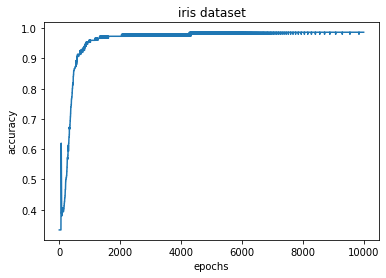

In [16]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

In [17]:
accuracy

tensor(0.9867)

To be added to this notebook!

1- Add test data and plot test acc and test loss. ***

2- Try with normalized data.

3- Save the results as well as the trained model and do another experiment with the loaded model! *******

4- Do PCA on the data.

5- Try other classifiers than FCNN.

6- Do updates on batches and not the whole dataset at each epoch! ***

In [25]:
#1- We can use the train-test-split function in SKLearn to make train and test splits of the entire dataset.
sklearn.test_train_split(iris.data)

AttributeError: ignored

In [23]:
import sklearn

In [6]:
import sklearn.model_selection as model_selection

In [7]:
train_test_separated = model_selection.train_test_split(iris.data,iris.target, test_size = .1, random_state = 0)

In [8]:
train_data, test_data,train_label,test_label = train_test_separated

In [8]:
train_label

array([0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0,
       1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2,
       1, 2, 0])

In [9]:
#We transform the splitted data arrays to pytorch tensors.
iris_train = torch.from_numpy(train_data)
iris_test = torch.from_numpy(test_data)
iris_train_labels = torch.from_numpy(train_label)
iris_test_labels = torch.from_numpy(test_label)

In [10]:
#Now, we can complete the experiment.
epochs = range(3000)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr=1e-3)
iris_train = iris_train.float()
iris_test = iris_test.float()
#iris_labels_torch = torch.from_numpy(iris.target)
iris_train.requires_grad = True
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
   optimizer.zero_grad()
   output = my_net.forward(iris_train)
   predictions = torch.argmax(output, axis = 1)
   iris_loss = loss(output, iris_train_labels)
   iris_loss.backward()
   optimizer.step()
   accuracy = (predictions==iris_train_labels).float().mean()
   train_acc_list.append(accuracy)
   train_loss_list.append(iris_loss)

   test_output = my_net.forward(iris_test)
   test_preds = torch.argmax(test_output, axis = 1)
   iris_test_loss = loss(test_output, iris_test_labels)
   test_acc = (test_preds == iris_test_labels).float().mean()
   test_acc_list.append(test_acc)
   test_loss_list.append(iris_test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


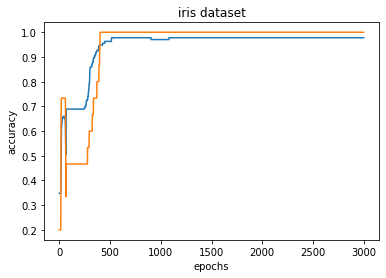

In [12]:
import matplotlib.pyplot as plt

plt.plot(epochs, train_acc_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

plt.plot(epochs, test_acc_list)

In [15]:
accuracy

tensor(0.9778)